<a href="https://colab.research.google.com/github/2403A53057/DAV/blob/main/ML_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
df=pd.read_csv('/content/gender_submission.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [67]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]


In [68]:
import numpy as np

In [69]:
x= np.array(x).reshape(-1,1)
y= np.array(y).reshape(-1,1)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
print("Training samples:",x_train.shape)
print("Testing samples:",x_test.shape)

Training samples: (334, 1)
Testing samples: (84, 1)


In [71]:
from sklearn.svm import SVC

In [72]:
svm_linear =SVC(kernel='linear', class_weight='balanced',C=0.01)


In [73]:
svm_linear.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, class_weight='balanced', kernel='linear')

In [74]:
y_pred= svm_linear.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurracy:",accuracy)

Acurracy: 0.5238095238095238


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)


Confusion Matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [78]:
precision = precision_score(y_test, y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.42857142857142855


In [79]:
recall = recall_score(y_test, y_pred, zero_division=0)
print("Recall:",recall)

Recall: 0.5294117647058824


In [80]:
f1=f1_score(y_test, y_pred, zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.47368421052631576


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
cm=confusion_matrix(y_test,y_pred, labels=[1,0])

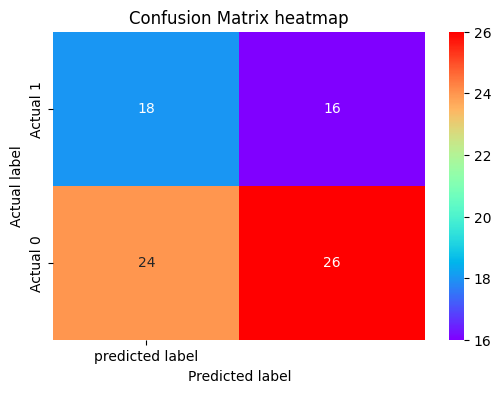

In [83]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow', xticklabels=['predicted label'], yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix heatmap')
plt.show()